### Imports

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [3]:
# setting up pandas options
pd.set_option('display.max_colwidth', None)

### Loading data

In [4]:
path = 'ecomm-open-cdp/items_ohe_2019_oct.csv'
items_df = pd.read_csv(path).reset_index(drop=True)

In [5]:
items_df = items_df.drop(['Unnamed: 0'],axis=1)
items_df.head()

,accessories.bag,accessories.umbrella,accessories.wallet,apparel.belt,apparel.costume,apparel.dress,apparel.jacket,apparel.jeans,apparel.jumper,apparel.scarf,...,kids.skates,kids.swing,kids.toys,medicine.tools.tonometer,sport.bicycle,sport.ski,sport.snowboard,sport.tennis,sport.trainer,stationery.cartrige
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Market Basket analysis

In [110]:
#exploring support
supports = items_df.apply(np.mean)
supports

accessories.bag         0.002452
accessories.umbrella    0.000048
accessories.wallet      0.000577
apparel.belt            0.000041
apparel.costume         0.000957
                          ...   
sport.ski               0.000033
sport.snowboard         0.000012
sport.tennis            0.000019
sport.trainer           0.000722
stationery.cartrige     0.000219
Length: 121, dtype: float64

In [111]:
supports.nlargest(10)

electronics.smartphone              0.589841
electronics.audio.headphone         0.056664
electronics.video.tv                0.039745
electronics.clocks                  0.033081
appliances.kitchen.washer           0.029997
computers.notebook                  0.028236
appliances.environment.vacuum       0.023924
appliances.kitchen.refrigerators    0.021000
electronics.tablet                  0.010202
auto.accessories.player             0.008786
dtype: float64

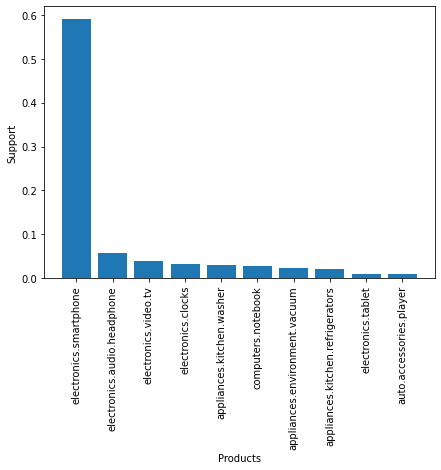

In [112]:
# supports plot 10 largest
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(supports.nlargest(10).index, supports.nlargest(10))
ax.set_xlabel('Products')
ax.set_ylabel('Support')
plt.xticks(rotation=90)
plt.show()

In [113]:
supports.nsmallest(10)

apparel.jacket                  0.000002
apparel.jumper                  0.000002
construction.tools.soldering    0.000002
apparel.shorts                  0.000004
apparel.skirt                   0.000008
sport.snowboard                 0.000012
apparel.shoes.slipons           0.000017
sport.tennis                    0.000019
apparel.scarf                   0.000021
apparel.shoes.ballet_shoes      0.000023
dtype: float64

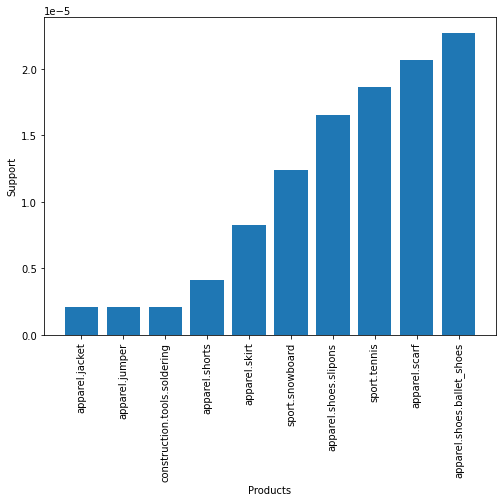

In [114]:
# supports plot 10 smallest
fig, ax = plt.subplots(figsize=(7,5))
plt.tight_layout()
ax.bar(supports.nsmallest(10).index, supports.nsmallest(10))
ax.set_xlabel('Products')
ax.set_ylabel('Support')
plt.xticks(rotation=90)
plt.show()

In [115]:
#apriori algorithm
#frequent_itemsets = apriori(items_df, min_support = 0.001, max_len = 2, use_colnames=True)
frequent_itemsets = fpgrowth(items_df, min_support = 0.0001, max_len =5 ,use_colnames=True)

In [116]:
len(frequent_itemsets)

137

In [117]:
frequent_itemsets

,support,itemsets
0,0.033081,(electronics.clocks)
1,0.039745,(electronics.video.tv)
2,0.004493,(appliances.kitchen.oven)
3,0.589841,(electronics.smartphone)
4,0.002010,(computers.peripherals.mouse)
...,...,...
132,0.000149,"(appliances.ironing_board, appliances.iron)"
133,0.000112,"(apparel.shoes, apparel.shoes.keds)"
134,0.000223,"(electronics.smartphone, apparel.shoes.keds)"
135,0.000101,"(computers.peripherals.mouse, computers.peripherals.keyboard)"


In [118]:
# get association rules with pruning
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.1) 

In [119]:
len(rules)

10

In [120]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(electronics.audio.subwoofer),(auto.accessories.player),0.006150,0.008786,0.000258,0.042031,4.783831,0.000204,1.034704
1,(auto.accessories.player),(electronics.audio.subwoofer),0.008786,0.006150,0.000258,0.029419,4.783831,0.000204,1.023974
2,(appliances.ironing_board),(appliances.iron),0.001305,0.007215,0.000149,0.114105,15.815963,0.000139,1.120658
3,(appliances.iron),(appliances.ironing_board),0.007215,0.001305,0.000149,0.020636,15.815963,0.000139,1.019739
4,(apparel.shoes),(apparel.shoes.keds),0.007963,0.005219,0.000112,0.014022,2.686732,0.000070,1.008928
5,(apparel.shoes.keds),(apparel.shoes),0.005219,0.007963,0.000112,0.021395,2.686732,0.000070,1.013725
6,(computers.peripherals.mouse),(computers.peripherals.keyboard),0.002010,0.001141,0.000101,0.050412,44.165608,0.000099,1.051886
7,(computers.peripherals.keyboard),(computers.peripherals.mouse),0.001141,0.002010,0.000101,0.088768,44.165608,0.000099,1.095210
8,(appliances.kitchen.hob),(appliances.kitchen.oven),0.001871,0.004493,0.000227,0.121547,27.050659,0.000219,1.133250
9,(appliances.kitchen.oven),(appliances.kitchen.hob),0.004493,0.001871,0.000227,0.050621,27.050659,0.000219,1.051349


### Visualizing rules

In [121]:
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

In [122]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,electronics.audio.subwoofer,auto.accessories.player,0.006150,0.008786,0.000258,0.042031,4.783831,0.000204,1.034704
1,auto.accessories.player,electronics.audio.subwoofer,0.008786,0.006150,0.000258,0.029419,4.783831,0.000204,1.023974
2,appliances.ironing_board,appliances.iron,0.001305,0.007215,0.000149,0.114105,15.815963,0.000139,1.120658
3,appliances.iron,appliances.ironing_board,0.007215,0.001305,0.000149,0.020636,15.815963,0.000139,1.019739
4,apparel.shoes,apparel.shoes.keds,0.007963,0.005219,0.000112,0.014022,2.686732,0.000070,1.008928
5,apparel.shoes.keds,apparel.shoes,0.005219,0.007963,0.000112,0.021395,2.686732,0.000070,1.013725
6,computers.peripherals.mouse,computers.peripherals.keyboard,0.002010,0.001141,0.000101,0.050412,44.165608,0.000099,1.051886
7,computers.peripherals.keyboard,computers.peripherals.mouse,0.001141,0.002010,0.000101,0.088768,44.165608,0.000099,1.095210
8,appliances.kitchen.hob,appliances.kitchen.oven,0.001871,0.004493,0.000227,0.121547,27.050659,0.000219,1.133250
9,appliances.kitchen.oven,appliances.kitchen.hob,0.004493,0.001871,0.000227,0.050621,27.050659,0.000219,1.051349


In [123]:
lift_table = rules.pivot(index='antecedents', columns='consequents', values='lift')
lift_table

consequents,apparel.shoes,apparel.shoes.keds,appliances.iron,appliances.ironing_board,appliances.kitchen.hob,appliances.kitchen.oven,auto.accessories.player,computers.peripherals.keyboard,computers.peripherals.mouse,electronics.audio.subwoofer
antecedents,,,,,,,,,,
apparel.shoes,NaN,2.686732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apparel.shoes.keds,2.686732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
appliances.iron,NaN,NaN,NaN,15.815963,NaN,NaN,NaN,NaN,NaN,NaN
appliances.ironing_board,NaN,NaN,15.815963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
appliances.kitchen.hob,NaN,NaN,NaN,NaN,NaN,27.050659,NaN,NaN,NaN,NaN
appliances.kitchen.oven,NaN,NaN,NaN,NaN,27.050659,NaN,NaN,NaN,NaN,NaN
auto.accessories.player,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.783831
computers.peripherals.keyboard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.165608,NaN
computers.peripherals.mouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.165608,NaN,NaN


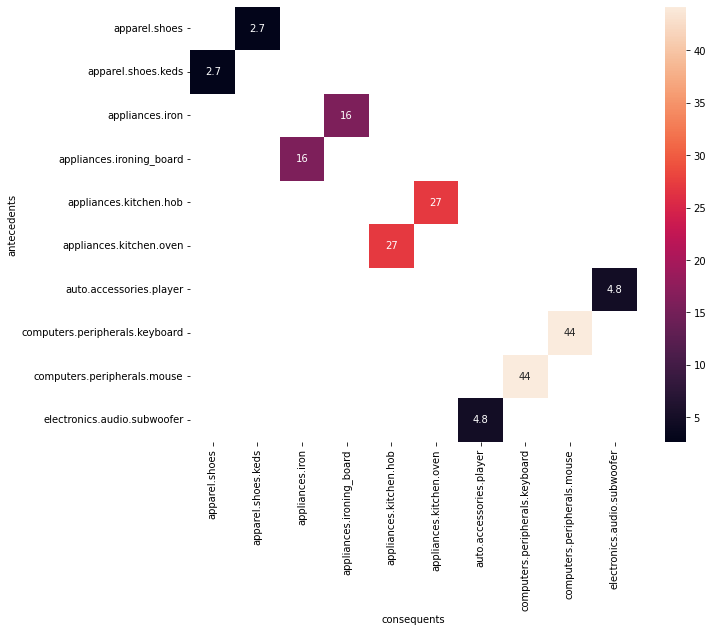

In [124]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(lift_table, annot=True, ax=ax)
plt.show()

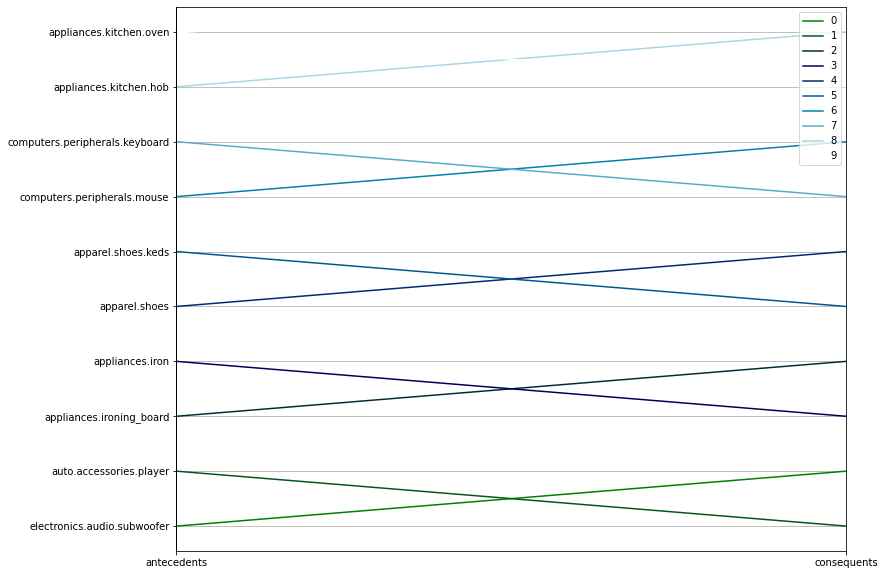

In [125]:
rules['rule'] = rules.index
coords = rules[['antecedents','consequents','rule']]
fig, ax = plt.subplots(figsize=(12,10))
parallel_coordinates(coords, 'rule', colormap = 'ocean', ax=ax)
plt.show()

### Cross-sells and promotional bundles

#### Cross-sells and promotional bucket heuristic:
 1. Group by lift/support to gather bidirectional relations
 2. If the difference on confidence is less than a threshold
     1. Create a bucket - items are very closely related
     2. Else - use the strongest directional relation for cross-sell

#### Promotional bundle logic

In [126]:
CONF_THRESH = 0.05

In [127]:
#rounding off floats before grouping
rules['lift'] = round(rules['lift'],5)

In [128]:
# promotional bundles logic 
promos_filt = rules.groupby('lift') \
     .filter(lambda x: np.abs( x['confidence'].iloc[0] - x['confidence'].iloc[1] ) < CONF_THRESH) \

promos = promos_filt.groupby('lift') \
     .apply(lambda x: list(x['antecedents']))\
     .to_frame('promo_buckets')\
     .reset_index()

#### Promotional bundles

In [129]:
promos

,lift,promo_buckets
0,2.68673,"[apparel.shoes, apparel.shoes.keds]"
1,4.78383,"[electronics.audio.subwoofer, auto.accessories.player]"
2,44.16561,"[computers.peripherals.mouse, computers.peripherals.keyboard]"


#### Cross-sell logic

In [130]:
#cross sell logic
cross_sells_cand = rules[~rules.antecedents.isin(promos_filt.antecedents)]
cross_sells_cand

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule
2,appliances.ironing_board,appliances.iron,0.001305,0.007215,0.000149,0.114105,15.81596,0.000139,1.120658,2
3,appliances.iron,appliances.ironing_board,0.007215,0.001305,0.000149,0.020636,15.81596,0.000139,1.019739,3
8,appliances.kitchen.hob,appliances.kitchen.oven,0.001871,0.004493,0.000227,0.121547,27.05066,0.000219,1.133250,8
9,appliances.kitchen.oven,appliances.kitchen.hob,0.004493,0.001871,0.000227,0.050621,27.05066,0.000219,1.051349,9


In [131]:
cross_sells = cross_sells_cand.groupby('lift')\
               .apply(lambda x: x[x['confidence'] ==  x['confidence'].max()])\
               .reset_index(drop=True)

#### Cross-sell items

In [132]:
cross_sells

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule
0,appliances.ironing_board,appliances.iron,0.001305,0.007215,0.000149,0.114105,15.81596,0.000139,1.120658,2
1,appliances.kitchen.hob,appliances.kitchen.oven,0.001871,0.004493,0.000227,0.121547,27.05066,0.000219,1.133250,8


In [135]:
cross_sells.antecedents.to_list()

['appliances.ironing_board', 'appliances.kitchen.hob']

In [142]:
np.array(promos.promo_buckets.to_list()).flatten().tolist()

['apparel.shoes',
 'apparel.shoes.keds',
 'electronics.audio.subwoofer',
 'auto.accessories.player',
 'computers.peripherals.mouse',
 'computers.peripherals.keyboard']